In [1]:
import pandas as pd
prefix = "ml-100k/"
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

ratings_base = pd.read_csv('ml-100k/ua.base', sep='\t', names=r_cols, encoding='latin-1')
ratings_test = pd.read_csv('ml-100k/ua.test', sep='\t', names=r_cols, encoding='latin-1')
ratings_base['rating'] = ratings_base['rating'].apply(lambda x: 1 if x >= 3 else 0)
ratings_base 


,user_id,movie_id,rating,unix_timestamp
0,1,1,1,874965758
1,1,2,1,876893171
2,1,3,1,878542960
3,1,4,1,876893119
4,1,5,1,889751712
...,...,...,...,...
90565,943,1047,0,875502146
90566,943,1074,1,888640250
90567,943,1188,1,888640250
90568,943,1228,1,888640275


In [2]:
# Sort the DataFrame by the 'timestamp' column
ratings_base = ratings_base.sort_values(by='unix_timestamp')
ratings_base

,user_id,movie_id,rating,unix_timestamp
22859,259,286,1,874724727
22863,259,298,1,874724754
22855,259,185,1,874724781
22851,259,173,1,874724843
22845,259,108,1,874724882
...,...,...,...,...
71890,729,322,1,893286637
71893,729,362,1,893286637
71889,729,313,1,893286638
71887,729,300,1,893286638


In [3]:
str = ['movie_id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
item = pd.read_csv(prefix + 'u.item', sep='|', names=str, encoding='latin-1')
selected_columns = ['movie_id'] + list(item.columns[-19:])

item = item[selected_columns]
item

,movie_id,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1678,1679,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1679,1680,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1680,1681,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
occupation = pd.read_csv(prefix + 'u.occupation', sep='|',names = ['occupation'],  encoding='latin-1')
occupation = {value: key for key, value in enumerate(occupation['occupation'])}

In [5]:
user = pd.read_csv(prefix + 'u.user', sep='|', names=["user_id", "age", "gender", "occupation", "zip_code"], encoding='latin-1')
user.drop('zip_code', axis=1, inplace=True)
user 

,user_id,age,gender,occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other
...,...,...,...,...
938,939,26,F,student
939,940,32,M,administrator
940,941,20,M,student
941,942,48,F,librarian


In [6]:

bin_labels = [0, 1, 2, 3, 4]  # Labels for the age intervals
bins = [0, 18, 25, 35, 45, float('inf')]  # Age intervals
user['age'] = pd.to_numeric(user['age']).astype(float)
user['age'] = pd.cut(user['age'], bins=bins, labels=bin_labels)
user['gender'] = user['gender'].replace({'M': 1, 'F': 0})
user['occupation'] = user['occupation'].replace(occupation)
user

,user_id,age,gender,occupation
0,1,1,1,19
1,2,4,0,13
2,3,1,1,20
3,4,1,1,19
4,5,2,0,13
...,...,...,...,...
938,939,2,0,18
939,940,2,1,0
940,941,1,1,18
941,942,4,0,10


In [7]:
distinct_values = user['age'].unique()

print("Distinct values using unique():")
print(distinct_values)

Distinct values using unique():
[1, 4, 2, 3, 0]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]


In [8]:
distinct_values = user['occupation'].unique()

print("Distinct values using unique():")
print(len(distinct_values))

Distinct values using unique():
21


In [9]:
from tqdm import tqdm
import numpy as np
# Calculate the probability based on appear_time^0.75
ratings_base['probability'] = ratings_base.groupby('movie_id').cumcount().add(1).pow(0.75)

# Generate a set of negative items for each transaction
ratings_base['negative_item'] = np.random.choice(ratings_base['movie_id'], size=len(ratings_base), p=ratings_base['probability'] / ratings_base['probability'].sum())

ratings_base

,user_id,movie_id,rating,unix_timestamp,probability,negative_item
22859,259,286,1,874724727,1.000000,475
22863,259,298,1,874724754,1.000000,131
22855,259,185,1,874724781,1.000000,526
22851,259,173,1,874724843,1.000000,61
22845,259,108,1,874724882,1.000000,174
...,...,...,...,...,...,...
71890,729,322,1,893286637,48.732086,109
71893,729,362,1,893286637,10.158206,8
71889,729,313,1,893286638,68.082202,68
71887,729,300,1,893286638,80.398344,181


In [10]:
rate_0 = ratings_base[ratings_base['rating'] == 0].reset_index().drop('index',axis=1)  # DataFrame containing rows where 'rate' is 0
rate_1 = ratings_base[ratings_base['rating'] == 1].reset_index().drop('index',axis=1)
rate_1

,user_id,movie_id,rating,unix_timestamp,probability,negative_item
0,259,286,1,874724727,1.000000,475
1,259,298,1,874724754,1.000000,131
2,259,185,1,874724781,1.000000,526
3,259,173,1,874724843,1.000000,61
4,259,108,1,874724882,1.000000,174
...,...,...,...,...,...,...
74622,729,322,1,893286637,48.732086,109
74623,729,362,1,893286637,10.158206,8
74624,729,313,1,893286638,68.082202,68
74625,729,300,1,893286638,80.398344,181


In [11]:
new_column = list(rate_1.columns)+list(item.columns[-19:])
last_n = pd.DataFrame(columns=new_column)
last_n

,user_id,movie_id,rating,unix_timestamp,probability,negative_item,unknown,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western


In [12]:
import numpy as np
from tqdm import tqdm
n = 10
for index,row in tqdm(rate_1.iterrows()):

    last_n_row = row.values.tolist()
    current_record = item[item['movie_id'] == row['movie_id']].values[0][-19:].flatten()
    filtered_list = rate_1[rate_1['unix_timestamp'] < row['unix_timestamp']].head(n)["movie_id"].tolist()
    for movieid in filtered_list:
        current_record = np.add(current_record,item[item['movie_id'] == movieid].values[0][-19:].flatten())
    last_n_row.extend(current_record.tolist())
    last_n.loc[index] = last_n_row
last_n.to_csv(prefix+'last_n.csv', index=False)
last_n


0it [00:00, ?it/s]

74627it [06:25, 193.74it/s]


,user_id,movie_id,rating,unix_timestamp,probability,negative_item,unknown,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,259.0,286.0,1.0,874724727.0,1.000000,475.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,259.0,298.0,1.0,874724754.0,1.000000,131.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
2,259.0,185.0,1.0,874724781.0,1.000000,526.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.0,1.0,2.0,1.0,0.0
3,259.0,173.0,1.0,874724843.0,1.000000,61.0,0.0,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,3.0,1.0,2.0,1.0,0.0
4,259.0,108.0,1.0,874724882.0,1.000000,174.0,0.0,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,3.0,1.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74622,729.0,322.0,1.0,893286637.0,48.732086,109.0,0.0,2.0,1.0,0.0,...,0.0,0.0,4.0,0.0,1.0,3.0,1.0,4.0,1.0,0.0
74623,729.0,362.0,1.0,893286637.0,10.158206,8.0,0.0,3.0,1.0,0.0,...,0.0,0.0,4.0,1.0,0.0,3.0,1.0,3.0,1.0,0.0
74624,729.0,313.0,1.0,893286638.0,68.082202,68.0,0.0,3.0,1.0,0.0,...,0.0,0.0,4.0,0.0,0.0,4.0,1.0,3.0,1.0,0.0
74625,729.0,300.0,1.0,893286638.0,80.398344,181.0,0.0,3.0,1.0,0.0,...,0.0,0.0,4.0,0.0,0.0,3.0,1.0,4.0,1.0,0.0


In [13]:
last_n = pd.read_csv(prefix+'last_n.csv')

In [14]:
rate_0.groupby('user_id')['movie_id'].apply(list).reset_index()

,user_id,movie_id
0,1,"[245, 260, 126, 264, 237, 11, 8, 143, 94, 145,..."
1,2,"[315, 294, 10, 309]"
2,3,"[302, 300, 333, 288, 319, 258, 352, 341, 272, ..."
3,4,[358]
4,5,"[369, 411, 368, 406, 397, 229, 231, 450, 449, ..."
...,...,...
878,939,"[266, 680, 890]"
879,940,"[319, 264, 271, 358, 343, 69, 1401, 171, 215, ..."
880,941,"[358, 222]"
881,942,[269]


### Preparing network

In [15]:
rate_1[(rate_1['user_id'] == 717)]

,user_id,movie_id,rating,unix_timestamp,probability,negative_item
45339,717,302,1,884641599,36.482873,54
45340,717,340,1,884641599,24.974232,195
45341,717,326,1,884641621,25.230380,503
45342,717,262,1,884641621,13.137758,1047
45343,717,303,1,884641644,20.196309,246
...,...,...,...,...,...,...
45405,717,628,1,884644605,32.566794,273
45497,717,50,1,884715122,75.304398,1016
45498,717,246,1,884715146,23.679999,184
45499,717,127,1,884715172,57.512829,118


In [16]:
# import package 
import numpy as np
import pandas as pd
from torch.utils.data import Dataset
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data import random_split
import csv
try:
    from tqdm.auto import tqdm
except:
    !pip install -q tqdm
    from tqdm.auto import tqdm

c:\Users\marcowong\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
category_features = {k:2 for k in list(item.columns.unique()) if k != "movie_id"}
users_features = {"age_range":5,"gender":2,"occupation":21}
users_features.update(category_features)
ln = [16,4]
lr = 1e-3
epochs = 5
batch_size = 64
lr_lambda = 1e-4

In [18]:
criterion = nn.MarginRankingLoss(margin=0.7)
split_ratio = 0.9

In [19]:
import numpy as np
import torch
import random
def sample_equally(row,df):
    random_number = round(np.random.random())
    
    if random_number == 1:
        all_values = df[df['user_id'] == row['user_id']]
        all_values = all_values["movie_id"].values
        if all_values.size > 0 :
            all_values = all_values[0]
            return random.choice(all_values)
        else:
            return row["negative_item"]
    else:
        return row["negative_item"]

class ReadDataset_retrieve(Dataset):
    def __init__(self, rate_0, rate_1, user_property, item_property,is_test=False):
        super().__init__()
        self.is_test = is_test
        self.rating = rate_1
        self.user_property = user_property
        self.item_property = item_property
        
        if not is_test:
            self.complex_neg = rate_0.groupby('user_id')['movie_id'].apply(list).reset_index()
            self.rating["negative_item"] = rate_1.apply(lambda x: sample_equally(x,self.complex_neg), axis=1)
        # self.label = self.field[:,-1]
        # self.field = self.field[:,:-1]


    def __len__(self):
        return len(self.rating)

    def __getitem__(self, item):
        #give a postive sample and a neg
        row = self.rating.loc[item]
        user_property = torch.tensor(*self.user_property[self.user_property["user_id"] == row["user_id"]].iloc[:, 1:].values)
        user_last_n = torch.tensor(row[-19:].values)
        user_property = torch.cat((user_property,user_last_n),dim=0).long()
        pos_property = torch.tensor(*self.item_property[self.item_property["movie_id"] == row["movie_id"]].iloc[:, 1:].values)
        if not self.is_test:
            neg_property = torch.tensor(*self.item_property[self.item_property["movie_id"] == row["negative_item"]].iloc[:, 1:].values)
            return user_property, pos_property, neg_property
        return user_property, pos_property

In [20]:
from torch import nn

class SimpleTwoTower(nn.Module):
    
    def __init__(self, user_features, category_features,ln):
        super().__init__()


        # self.item_emb = nn.Embedding(num_embeddings=n_items, embedding_dim=self.ln[0])
        self.embedding_dict_user = {}
        self.user_features = user_features
        self.user_ln = 0
        for feature,num in self.user_features.items():
            num = int(num)
            if num <=1000:
                output_dim = int(num/2)
            if num <=2:
                embedding_layer = nn.Identity()
                self.user_ln += output_dim
                
            else:
                self.user_ln += output_dim
                embedding_layer = nn.Embedding(num_embeddings=num, embedding_dim=output_dim)
            self.embedding_dict_user[feature] = embedding_layer

       
        
        self.item_layers = torch.nn.ModuleList()
        self.user_layers = torch.nn.ModuleList()

        self.item_layers.append(nn.Linear(len(category_features.keys()), ln[0], bias=True))
        self.user_layers.append(nn.Linear(self.user_ln, ln[0], bias=True))
        
        for i, n in enumerate(ln[0:-1]):
            m = int(ln[i+1])
            self.item_layers.append(nn.Linear(n, m, bias=True))
            self.item_layers.append(nn.ReLU())
            
            self.user_layers.append(nn.Linear(n, m, bias=True))
            self.user_layers.append(nn.ReLU())
            
            
        self.item_layers = nn.Sequential(*self.item_layers)
        self.user_layers = nn.Sequential(*self.user_layers)
        

        
    def forward(self,user ,category1, category2=None,mode = 'item'):
        if self.training is True:

            embedding_result_user = []
            for i,feature in enumerate(self.user_features.keys()):
                vector = user[:, i]
                embedding = self.embedding_dict_user[feature](vector)
                if (self.user_features[feature] <= 2):
                    embedding = embedding.unsqueeze(1)
                embedding_result_user.append(embedding)
            # feature should include item id
            user_emb_cat = torch.cat(tuple(embedding_result_user), dim=1)
            
            item_emb_cat1 = self.item_layers(category1.float())
            item_emb_cat2 = self.item_layers(category2.float())
            user_emb = self.user_layers(user_emb_cat.float())


            eps = 1e-1
            dp1 = torch.mul(user_emb, item_emb_cat1).sum(-1)
            cos1 = dp1/((torch.norm(user_emb,dim=1, p=2)+eps) * (torch.norm(item_emb_cat1,dim=1, p=2)+eps))
            dp2 = torch.mul(user_emb, item_emb_cat2).sum(-1)
            cos2 = dp2/((torch.norm(user_emb,dim=1, p=2)+eps) * (torch.norm(item_emb_cat1,dim=1, p=2))+eps)


            return cos1,cos2
        else:
            if mode=='item':

                item_emb_cat1 = self.item_layers(category1.float())
                # user_emb = self.user_layers(user_emb)

                # dp1 = self.dot(user_emb, item_emb_cat1.t())
                # cos1 = dp1//(len(user_emb)* len(item_emb_cat1))

                return item_emb_cat1
            else:
                embedding_result_user = []
                for i,feature in enumerate(self.user_features.keys()):
                    vector = user[i:i+1]
                    embedding = self.embedding_dict_user[feature](vector)
                    if (self.user_features[feature] <= 2):
                        embedding = embedding.unsqueeze(1)
                    embedding_result_user.append(embedding)
                # feature should include item id
                user_emb_cat = torch.cat(tuple(embedding_result_user), dim=1)
                user_emb = self.user_layers(user_emb_cat)

                return user_emb

In [21]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = SimpleTwoTower(users_features, category_features,ln)
model = model.to(device)
optimizer = torch.optim.Adam(params=model.parameters(), lr=lr, weight_decay = lr_lambda)

In [22]:
def cal_val_loss(loader):
    loss_list = []
    for user_property, pos_property, neg_property in loader:
        cos1,cos2 = model(user_property.to(device), pos_property.to(device), neg_property.to(device))
        margin = torch.ones(user_property.size()[0])
        loss = criterion(cos1,cos2,margin)
        loss_list.append(loss)
    
    return sum(loss_list)/len(loss_list)

In [23]:
myseed = 123
torch.manual_seed(myseed)
train_data = ReadDataset_retrieve(rate_0,last_n,user,item)
len_train = len(train_data)
split_num = [int(len_train*split_ratio), len_train-int(len_train*split_ratio)]
train_data, val_data = random_split(
                            dataset=train_data,
                            lengths=split_num,
                            generator=torch.Generator().manual_seed(myseed)
                        )
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
# test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [24]:
from tqdm import tqdm
# Training
model.train()
for epoch in range(epochs):
    for user_property, pos_property, neg_property in tqdm(train_loader):
        cos1,cos2 = model(user_property.to(device), pos_property.to(device), neg_property.to(device))
        margin = torch.ones(user_property.size()[0])
        loss = criterion(cos1,cos2,margin)
        model.zero_grad()
        loss.backward()
        optimizer.step()
        
    # calculate validation
    val_loss = cal_val_loss(val_loader)
    print("Validation Result: {}".format(val_loss))
    # if not early_stopper.is_continuable(model, loss):
    #     break
torch.save(model,'retrive_model.pt')

100%|██████████| 1050/1050 [01:11<00:00, 14.72it/s]


Validation Result: 0.34292128682136536


100%|██████████| 1050/1050 [01:12<00:00, 14.43it/s]


Validation Result: 0.3291151225566864


100%|██████████| 1050/1050 [01:11<00:00, 14.78it/s]


Validation Result: 0.3263494372367859


100%|██████████| 1050/1050 [01:12<00:00, 14.53it/s]


Validation Result: 0.3262467384338379


100%|██████████| 1050/1050 [01:10<00:00, 14.97it/s]


Validation Result: 0.3248479664325714


In [25]:
ratings_test = pd.read_csv('ml-100k/ua.test', sep='\t', names=r_cols, encoding='latin-1')
ratings_test['rating'] = ratings_test['rating'].apply(lambda x: 1 if x >= 3 else 0)
ratings_test = ratings_test[ratings_test['rating'] == 1].reset_index().drop('index',axis=1)
ratings_test

,user_id,movie_id,rating,unix_timestamp
0,1,20,1,887431883
1,1,33,1,878542699
2,1,61,1,878542420
3,1,117,1,874965739
4,1,160,1,875072547
...,...,...,...,...
7888,943,186,1,888639478
7889,943,215,1,888639000
7890,943,232,1,888639867
7891,943,356,1,888639598


In [26]:
unique_test_user = ratings_test['user_id'].unique()

In [27]:
filtered_list = rate_1[rate_1['unix_timestamp'] < row['unix_timestamp']].head(n)["movie_id"].tolist()

In [28]:
import torch
model = torch.load('retrive_model.pt')
model.eval()
user_dict = {}
for userid in unique_test_user:
    user_property = torch.tensor(*user[user["user_id"] == userid].iloc[:, 1:].values)
    filtered_df = last_n[last_n['user_id'] == userid].iloc[-1]
    user_last_n = torch.tensor(filtered_df[-19:].values)
    user_property = torch.cat((user_property,user_last_n),dim=0).long()
    user_vector = model(user_property,None,mode='user')
    user_dict[userid] = user_vector


In [29]:
item_dict = {}
unique_item = item['movie_id'].unique()
for itemid in unique_item:
    item_property = torch.tensor(*item[item["movie_id"] == itemid].iloc[:, 1:].values)
    item_vector = model(None,item_property,mode='item')
    item_dict[itemid] = item_vector

In [30]:
import random
predict_dict = {}
for user,user_emb in user_dict.items():
    for item,item_emb in item_dict.items():
        value = torch.mul(user_emb, item_emb).sum(-1)
        eps = 1e-1
        value = value/((torch.norm(user_emb,dim=-1)+eps) * (torch.norm(item_emb,dim=-1)+eps))
        predict_dict.setdefault(user,[]).append((item,value))


In [31]:
ratings_test = pd.read_csv('ml-100k/ua.test', sep='\t', names=r_cols, encoding='latin-1')
# Filter the list of movie IDs using the user ID
actual_dict = {}
for index,row in ratings_test.iterrows():
    actual_dict.setdefault(row["user_id"],[]).append((row["movie_id"],row["rating"]))
for key in actual_dict.keys():
    actual_dict[key] = sorted(actual_dict[key], key=lambda x: x[1], reverse=True)
for key in predict_dict.keys():
    predict_dict[key] = sorted(predict_dict[key], key=lambda x: x[1], reverse=True)

In [32]:
import math
def NDCG(user_idx, n):

    dcg = 0
    idcg = 0
    key_list = predict_dict[user_idx][:n]
    key_list = [ k for k,v in key_list]
    r = []
    for key in key_list:
        for item,rate in actual_dict[user_idx]:
            if key == item:
                r.append(rate)
                break
        else: 
            r.append(0)


    y = actual_dict[user_idx][:n]

    if n > len(y): n = len(y)
    for j in range(n):
        dcg += 1.0*(2**r[j] - 1)/math.log(j + 2, 2)
        idcg += 1.0*(2**y[j][1] - 1)/math.log(j + 2, 2)
    if idcg > 0: 
        ndcg = dcg/idcg
    else:
        ndcg = 0
    return ndcg
def performance(n):

    hit = 0
    n_recall = 0
    n_precision = 0
    ndcg = 0

    for user_idx in unique_test_user:

        i = user_idx - 1
        y = [t[0] for t in actual_dict[user_idx]]
        y = set(y)
        y_hat = [t[0] for t in predict_dict[user_idx]]
        y_hat = y_hat[:n]
        y_hat = set(y_hat)

        tp = y_hat.intersection(y)
        hit += len(tp)

        n_recall += len(y)
        n_precision += n
        ndcg += NDCG(user_idx, n)

    recall = hit / (1.0 * n_recall)
    precision = hit / (1.0 * n_precision)
    ndcg /= len(unique_test_user)

    return recall, precision, ndcg

In [33]:
r_list = []
p_list = []
c_list = []
k_values = list(range(2, 400))
for k in k_values:
    recall, precision, ndcg = performance(k)
    r_list.append(recall)
    p_list.append(precision)
    c_list.append(ndcg)

In [34]:
import random
random.seed(myseed)
predict_dict = {}
for user,user_emb in user_dict.items():
    for item,item_emb in item_dict.items():
        value = random.uniform(-1, 1)
        predict_dict.setdefault(user,[]).append((item,value))

In [35]:
ratings_test = pd.read_csv('ml-100k/ua.test', sep='\t', names=r_cols, encoding='latin-1')
# Filter the list of movie IDs using the user ID
actual_dict = {}
for index,row in ratings_test.iterrows():
    actual_dict.setdefault(row["user_id"],[]).append((row["movie_id"],row["rating"]))
for key in actual_dict.keys():
    actual_dict[key] = sorted(actual_dict[key], key=lambda x: x[1], reverse=True)
for key in predict_dict.keys():
    predict_dict[key] = sorted(predict_dict[key], key=lambda x: x[1], reverse=True)

In [36]:
r_list1 = []
p_list1 = []
c_list1 = []
k_values = list(range(2, 400))
for k in k_values:
    recall, precision, ndcg = performance(k)
    r_list1.append(recall)
    p_list1.append(precision)
    c_list1.append(ndcg)

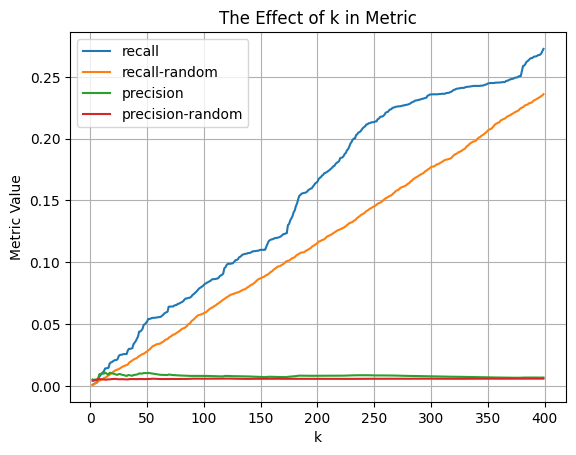

In [37]:
import matplotlib.pyplot as plt
# Define the values of k and the corresponding metric values


# Plot the graph for each metric
plt.plot(k_values, r_list, label='recall')
plt.plot(k_values, r_list1, label='recall-random')
plt.plot(k_values, p_list, label='precision')
plt.plot(k_values, p_list1, label='precision-random')

plt.xlabel('k')
plt.ylabel('Metric Value')
plt.title('The Effect of k in Metric')
plt.grid(True)
plt.legend()
plt.show()

In [38]:
[0.2798515376458112, 0.30943796394485684, 0.2985153764581124, 0.29692470837751855, 0.2949098621420997, 0.30042417815482503, 0.3040296924708378, 0.3005302226935313, 0.3081654294803818]
[0.006996288441145281, 0.007735949098621421, 0.0074628844114528105, 0.007423117709437964, 0.007372746553552492, 0.007510604453870626, 0.007600742311770944, 0.007513255567338282, 0.007704135737009544]
[0.006044365896824253, 0.010560514082618076, 0.00856496482642294, 0.008967791757633735, 0.004267213114503406, 0.008982858445075036, 0.009674034945169387, 0.009585737024045323, 0.010295549487567826]

[0.006044365896824253,
 0.010560514082618076,
 0.00856496482642294,
 0.008967791757633735,
 0.004267213114503406,
 0.008982858445075036,
 0.009674034945169387,
 0.009585737024045323,
 0.010295549487567826]

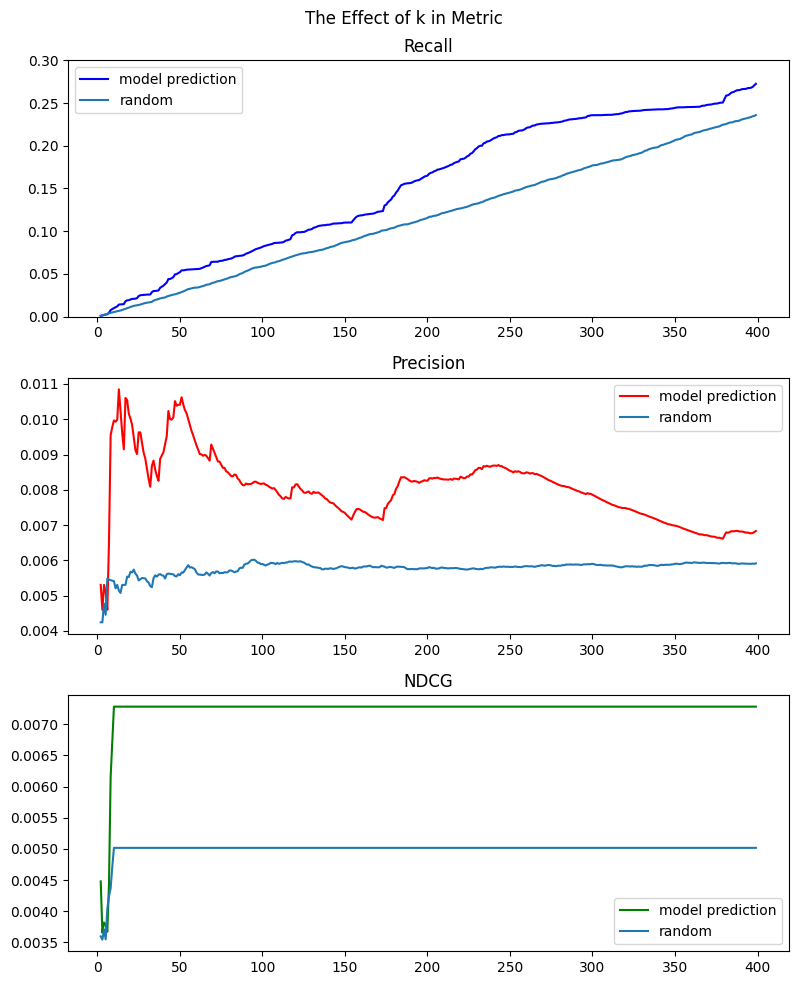

In [39]:
import matplotlib.pyplot as plt
import numpy as np


# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 10))

# Plot the first graph
ax1.plot(k_values, r_list, color='blue', label='model prediction')
ax1.plot(k_values, r_list1, label='random')
ax1.set_ylim(0, 0.3)
ax1.set_title('Recall')

# Plot the second graph
ax2.plot(k_values, p_list, color='red', label='model prediction')
ax2.plot(k_values, p_list1, label='random')
ax2.set_title('Precision')

# Plot the third graph
ax3.plot(k_values, c_list, color='green', label='model prediction')
ax3.plot(k_values, c_list1, label='random')
ax3.set_title('NDCG')

plt.suptitle('The Effect of k in Metric')

# Adjust spacing between subplots
plt.tight_layout()
ax1.legend()
ax2.legend()
ax3.legend()
# Display the plot
plt.show()

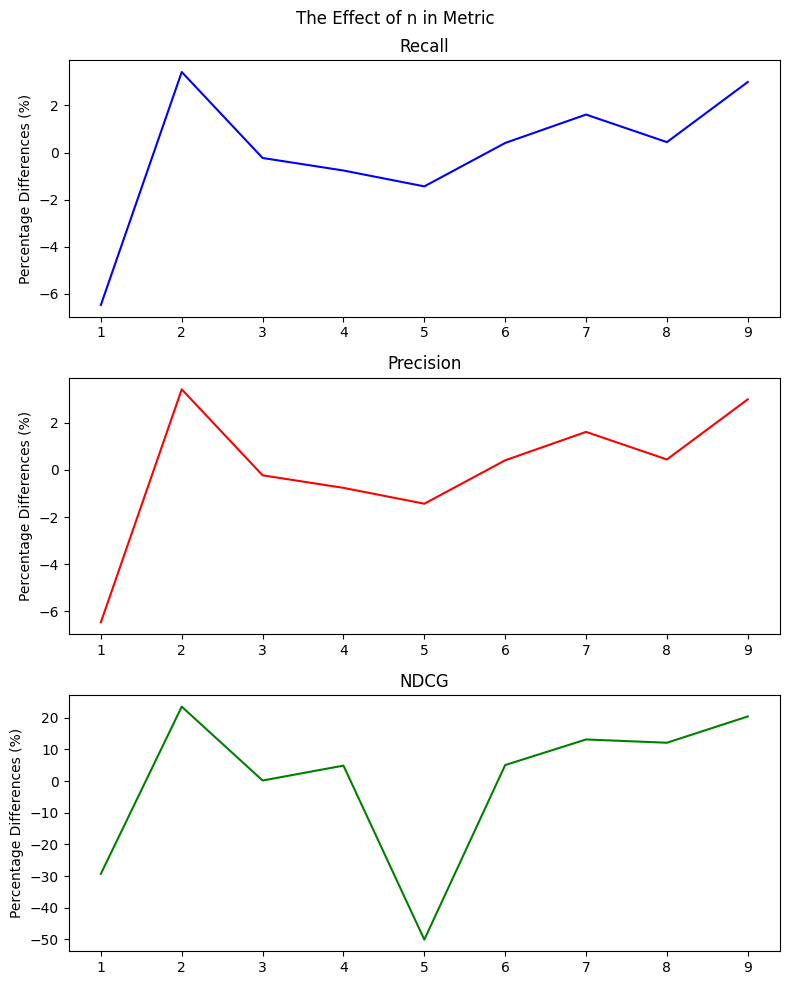

In [58]:
import matplotlib.pyplot as plt
import numpy as np

def cal_percent_diff(values):
    average = sum(values) / len(values)
    percentage_differences = [((value - average) / average) * 100 for value in values]
    return percentage_differences
# Generate some sample data
n_values = range(1,10)
recall_list = [0.2798515376458112, 0.30943796394485684, 0.2985153764581124, 0.29692470837751855, 0.2949098621420997, 0.30042417815482503, 0.3040296924708378, 0.3005302226935313, 0.3081654294803818]
precision_list =[0.006996288441145281, 0.007735949098621421, 0.0074628844114528105, 0.007423117709437964, 0.007372746553552492, 0.007510604453870626, 0.007600742311770944, 0.007513255567338282, 0.007704135737009544]
NDCG_list =[0.006044365896824253, 0.010560514082618076, 0.00856496482642294, 0.008967791757633735, 0.004267213114503406, 0.008982858445075036, 0.009674034945169387, 0.009585737024045323, 0.010295549487567826]

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 10))

# Plot the first graph
ax1.plot(n_values, cal_percent_diff(recall_list), color='blue', label='model prediction')
ax1.set_ylabel('Percentage Differences (%)')
ax1.set_title('Recall')

# Plot the second graph
ax2.plot(n_values, cal_percent_diff(precision_list), color='red', label='model prediction')
ax2.set_ylabel('Percentage Differences (%)')
ax2.set_title('Precision')

# Plot the third graph
ax3.plot(n_values, cal_percent_diff(NDCG_list), color='green', label='model prediction')
ax3.set_ylabel('Percentage Differences (%)')
ax3.set_title('NDCG')

plt.suptitle('The Effect of n in Metric')


# Adjust spacing between subplots
plt.tight_layout()
# Display the plot
plt.show()